<a href="https://colab.research.google.com/github/ArnovanHilten/GenNet/blob/master/examples/A_to_Z/GenNet_A_to_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GenNet: Framework for Interpretable Neural Networks for Genetic Data

In this network we show all steps for using [GenNet](https://github.com/ArnovanHilten/GenNet).To use GenNet on your own data you need to have:


*   genotype data (vcf or plink format)
*   phenotype data
*   a working pc :)



---



**To start the tutorial:**
Click `File > Save a copy` in drive to save a copy in your own drive for full permisison. This tutorial has example data and can be run by `Runtime > Run all`


---



**Tutorial overview:**

1.   Installing GenNet
2.   Test GenNet Instalation with a quick run
3.   GenNet: from Plink to Prediction
      1. Converting Plink or VCF files
      2. Creating the network
      3. Running the network
      4. Plotting the results








## Installing GenNet

All comments cells that open with **%%bash** are inputs for the command line.

The requirements for GenNet can be found in the README of the github: https://github.com/ArnovanHilten/GenNet

**Note:** GenNet can run on CPU and GPU. If you want to use GenNet with your GPU you need to ensure that you have CUDA installed that works with the tensorflow version.

In [1]:
%%bash
git clone https://github.com/ArnovanHilten/GenNet.git  # Cloning the repositorie

Cloning into 'GenNet'...


Move into the GenNet directory

In [2]:
%cd GenNet

/content/GenNet


Install the requirements

In [3]:
#@title Default title text
%%bash
 # navigate to the created folder
pip3 install --upgrade pip  # update pip is recommended but not a necessity
pip3 install -r requirements_GenNet.txt # install all the requirementes voor GenNet.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.2/516.2 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 82.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.6/454.6 kB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.4.1 which is incompatible.
jaxlib 0.3.14+cuda11.cudnn805 requires scipy>=1.5, but you have scipy 1.4.1 which is incompatible.
jax 0.3.14 requires scipy>=1.5, but you have scipy 1.4.1 which is incompatible.


If we want to convert data it is recommended to install bitarray as well

In [4]:
!pip install bitarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Test GenNet installation

Running the classification example:


*   **-path** is the path to the directory containing the files necessary to run GenNet.
*   **-ID is** the experment id. Make this unique for each experiment.



### Classification example

In [5]:
%%bash
cd GenNet # move into the GenNet folder
python GenNet.py train -path ./examples/example_classification/ -ID 9999 -epochs 50  # run the classificaiton example.

no slurm id
number of covariates: 0
Covariate columns found: []
mode is classification
Resultspath did not exist but is made now
weight_possitive_class 1
weight_possitive_class 1
jobid =  9999
folder = GenNet_experiment_9999
batchsize = 32
lr = 0.001
Creating networks from npz masks
regression False
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 100)]        0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 100, 1)       0           input_layer[0][0]                
__________________________________________________________________________________________________
LocallyDirected_0 (LocallyDirec (None, 10, 1)        110         reshape[0][0]            

bash: line 1: cd: GenNet: No such file or directory
2022-08-04 09:27:42.079547: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-08-04 09:27:42.189174: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-08-04 09:27:42.189389: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (052b37fa6983): /proc/driver/nvidia/version does not exist
2022-08-04 09:27:42.189827: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-08-04 09:27:42.235812: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2199995000 Hz
2022-08-04 09:27:42.236182: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2f7af40 initialized for platform Host (this does not guarant

### Results
Results can be found in GenNet/results/

In [6]:
%%bash
ls results/GenNet_experiment_9999_/

bestweights_job.h5
connection_weights.csv
model_architecture.txt
pd_summary_results.csv
ptest.npy
pval.npy
results_summary.txt
train_log.csv
train_val_loss.png


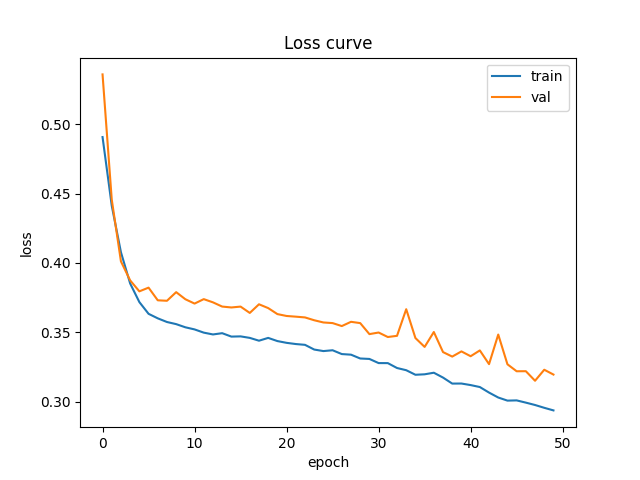

In [7]:
from IPython.display import Image
Image('results/GenNet_experiment_9999_/train_val_loss.png')

GenNet would normally train longer (both training and validation are still decreasing) but we set the -epochs to 50 for speed

In [8]:
import pandas as pd
pd.read_csv('results/GenNet_experiment_9999_/pd_summary_results.csv', index_col = 0)

,0
Jobid,9999
Datapath,./examples/example_classification/
genotype_path,./examples/example_classification/
Batchsize,32
Learning rate,0.001
L1 value,0.01
patience,50
epoch size,4000
epochs,50
Weight positive class,1


We obtain an AUC of roughly 0.90

### Help function

For more information and options see the --help function:

In [9]:
!python GenNet.py --help # to see the general options

usage: GenNet.py [-h] {convert,train,plot,topology} ...

GenNet: Interpretable neural networks for phenotype prediction.

positional arguments:
  {convert,train,plot,topology}
                        GenNet main options
    convert             Convert genotype data to hdf5
    train               Trains the network
    plot                Generate plots from a trained network
    topology            Create standard topology files

optional arguments:
  -h, --help            show this help message and exit

Check the wiki on github.com/arnovanhilten/gennet/ for more info


In [10]:
!python GenNet.py train --help # to see the options for GenNet train

usage: GenNet.py train [-h] -path PATH -ID ID [-genotype_path GENOTYPE_PATH]
                       [-network_name NETWORK_NAME]
                       [-problem_type {classification,regression}]
                       [-wpc weight positive class] [-lr learning rate]
                       [-bs batch size] [-epochs number of epochs]
                       [-workers number of workers for multiprocessing] [-L1]
                       [-mixed_precision] [-suffix extra_info]
                       [-out outfolder]
                       [-mask_order mask_order [mask_order ...]]
                       [-epoch_size epoch_size] [-patience patience] [-resume]

optional arguments:
  -h, --help            show this help message and exit
  -path PATH            Path to the data. Subject file, npz masks/topology
                        and/or genotype.h5
  -ID ID                Number of the experiment
  -genotype_path GENOTYPE_PATH
                        Path to genotype data if the location is 

## GenNet: from Plink to Prediction 

### Converting the data

You can do this step by step or use the flag  -step **all**. If you want to use a cluster and run the preprocessing in parallel (recommended for datasets > 100 gb) use the steps and add the -n_jobs with the number of parallel jobs. Each output will guide you trough the next step

*Note: HDF5 reads fast the rows but not the columns so we need to transpose the data since we want to train the network per patient.*

*   **hase_convert**: Converts the data into hdf5 format. Each row is a SNP, each column is a patient
*   **merge**: Merge the hase_covert chunks in a single file
*   **impute_missing**: Impute missing SNP values in the genotype matrix to have the mean value over all others
*   **exclude**: Exclude the SNPs you dont need to limit computational cost
*   **transpose**: Transposes the genotype matrix to have individuals on each row and SNPs for the columns.
*   **merge_transpose**: Merge the transposed genotype matrix in a single file

*If you have a lot of RAM available and a large dataset that will fit into this memory, it might be faster to use a simple script to transpose the matrix in memory*



In [11]:
!python GenNet.py convert --help # show the options for converting the data

usage: GenNet.py convert [-h] [-g GENOTYPE [GENOTYPE ...]] -study_name
                         STUDY_NAME [STUDY_NAME ...] [-variants VARIANTS]
                         [-o OUT] [-ID] [-vcf] [-tcm TCM]
                         [-step {all,hase_convert,merge,impute_missing,exclude,transpose,merge_transpose,checksum}]
                         [-n_jobs N_JOBS] [-comp_level COMP_LEVEL]

optional arguments:
  -h, --help            show this help message and exit
  -g GENOTYPE [GENOTYPE ...], --genotype GENOTYPE [GENOTYPE ...]
                        Path/paths to genotype data folder
  -study_name STUDY_NAME [STUDY_NAME ...]
                        Name for saved genotype data, without ext
  -variants VARIANTS    Path to file with row numbers of variants to include,
                        if none is given all variants will be used
  -o OUT, --out OUT     Path for saving the results, default ./processed_data
  -ID                   Flag to convert minimac data to genotype per subject
     

In [12]:
!python GenNet.py convert -g ./examples/A_to_Z/plink/ -o ./examples/A_to_Z/processed_data/  -study_name GenNet_simulation -step all

using ./examples/A_to_Z/processed_data//
Number of Individuals: 14000
Number of Probes 100 in GenNet_simulation.bim
Number of Probes 100 converted
next 100 SNPs, from 100, need to convert 0
Time to read 100 SNPs is 0.2503950595855713 s
Time to write 100 SNPs is 0.002820253372192383 s
Number of individuals 14000 
     family  ... label
0  family_1  ...     1
1  family_2  ...     0
2  family_3  ...     0
3  family_4  ...     0
4  family_5  ...     0

[5 rows x 6 columns]
Converted number of variants 100
   CHR  ...              allele2
0   16  ... -3936497528413860599
1   16  ... -4778658839313994531
2   16  ... -3936497528413860599
3   16  ... -4778658839313994531
4   16  ... -3936497528413860599
5   16  ...  -432850505543740740
6   16  ... -4778658839313994531
7   16  ... -3936497528413860599
8   16  ... -1925173320777109638
9   16  ... -1925173320777109638

[10 rows x 6 columns]
Number of variants in genotype folder 100
[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 1]
 [1 1 2 ... 1 2 1]
 ...
 [2

### Creating the network 

Now make the neural network from prior biological knowledge. Here we will use gene annotations. In the framework there is also the possibility to use gene annotations and KEGG pathway annotations. GenNet topology allows for the fast creation of gene and pathway layers. You can make an .npz mask or a topology.csv



---



Other prior biological knowledge based layers can be easily created:

*A .npz mask is recommended if you want to make a deeper network since it provides more flexibility.*

For the GenNet layer you need to have this npz mask to guide the network connections. The mask is simply a connectivity matrix:
    # The matrix has the shape of (N_nodes_layer_1, N_nodes_layer_2).
    # It is a sparse matrix with zeros for no connections and ones if there is a connections. For example.
    #             output
    #           1 2 3 4 5
    # input 1 | 1 0 0 0 0 |
    # input 2 | 1 1 0 0 0 |
    # input 3 | 0 1 0 0 0 |
    # input 4 | 0 1 0 0 0 |
    # input 5 | 0 0 1 0 0 |
    # input 6 | 0 0 0 1 0 |
    # input 7 | 0 0 0 1 0 |
    # This connects the first two inputs (1,2) to the first neuron in the second layer.
    # Connects input 2,3 and 4 to output neuron 2.
    # Connects input 5 to output neuron 3
    # Connects input 6 and 7 o the 4th neuron in the subsequent layer
    # Connects nothing to the 5th neuron
    #
    # Writtem for Gennet framework: interpretable neural networks for phenotype prediction
    # (https://www.biorxiv.org/content/10.1101/2020.06.19.159152v1.full)


Run Annovar (https://annovar.openbioinformatics.org/en/latest/) or your  favorite annotation tool to gain the biological knowledge (e.g gene annotations) to build your network. For annovar we can obtain the right input format with:

In [13]:
!python GenNet.py topology -type create_annovar_input -path ./examples/A_to_Z/processed_data/ -study_name GenNet_simulation -out examples/A_to_Z/processed_data/


(100, 6)
Number of variants (100, 6)


Annovar input files ready 

Install annovar: https://doc-openbio.readthedocs.io/projects/annovar/en/latest/user-guide/download/
Navigate to annovar, e.g cd /home/charlesdarwin/annovar/
Update annovar:
 perl annotate_variation.pl -buildver hg19 -downdb -webfrom annovar refGene humandb/
Run:
 perl annotate_variation.pl -geneanno -dbtype refGene -buildver hg19 examples/A_to_Z/processed_data//annovar_input_GenNet_simulation.csv humandb --outfile examples/A_to_Z/processed_data//GenNet_simulation_RefGene


After obtaining the Annovar annotations, run topology create_gene_network to get the topology file for the SNPs-gene-output network:


Now run the given lines in the folder with annovar:

```
perl annotate_variation.pl -buildver hg19 -downdb -webfrom annovar refGene humandb/
```
After updating the obtaining the annotation:
```
 perl annotate_variation.pl -geneanno -dbtype refGene -buildver hg19 examples/A_to_Z/processed_data//annovar_input_GenNet_simulation.csv humandb --outfile examples/A_to_Z/processed_data//GenNet_simulation_RefGene

```



For this example the gene annotations from Annovar are already placed in the processed data folder:

In [14]:
%ls examples/A_to_Z/processed_data/

annovar_input_GenNet_simulation.csv
GenNet_simulation_RefGene.exonic_variant_function
GenNet_simulation_RefGene.variant_function
GenNet_simulation_std.npy
GenNet_simulation_step2_merged_genotype.h5
GenNet_simulation_step3_genotype_no_missing.h5
genotype/
genotype.h5
individuals/
probes/


In [15]:
!python GenNet.py topology -type create_gene_network -path examples/A_to_Z/processed_data/ -out examples/A_to_Z/processed_data/ -study_name GenNet_simulation


GenNet_simulation
99
Topology file saved: examples/A_to_Z/processed_data///topology.csv
Alternatively you can choose to use the .npz mask (building blocks for deeper networks) examples/A_to_Z/processed_data///SNP_gene_mask The mask has shape: (100, 10)


In [16]:
%%bash
mkdir examples/A_to_Z/new_run_folder/
mv examples/A_to_Z/processed_data/topology.csv  examples/A_to_Z/new_run_folder/ # or SNP_gene_mask.npz (this gives more freedom in designing a network yourself)
mv examples/A_to_Z/processed_data/genotype.h5  examples/A_to_Z/new_run_folder/
cp examples/A_to_Z/run_folder/subjects.csv  examples/A_to_Z/new_run_folder/ # this contains the information per individual (who is case, who is control and on which row are they in the genotype matrix)


### Example of the subjects.csv

Can be simply constructed from a .fam file and your phenotype data. 

*   **labels** contains the phenotype information. 
    * For classification: cases are 1, controls are 0
    * For regression: can be any value
*   **patient_id**: something you use to identify the patients. Can be anything
*   **genotype_row**: the row in the genotype matrix in which the individual can be found (note that preprocessing does not change the order.
*   **Set**: Training set = 1, validation set = 2, test set = 3, 



In [17]:
pd.read_csv('examples/A_to_Z/run_folder/subjects.csv').head()

,patient_id,labels,genotype_row,set
0,sample_1,1,0,1
1,sample_2,0,1,1
2,sample_3,0,2,1
3,sample_4,0,3,1
4,sample_5,0,4,1


### Train the Network

Now train the network with the preprocessed data

In [18]:
!python GenNet.py train -path examples/A_to_Z/new_run_folder/ -ID 100001 -epochs 50

no slurm id
number of covariates: 0
Covariate columns found: []
mode is classification
Resultspath did not exist but is made now
weight_possitive_class 1
weight_possitive_class 1
jobid =  100001
folder = GenNet_experiment_100001
batchsize = 32
lr = 0.001
Creating networks from npz masks
regression False
2022-08-04 09:29:42.953479: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-08-04 09:29:42.963319: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-08-04 09:29:42.963372: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (052b37fa6983): /proc/driver/nvidia/version does not exist
2022-08-04 09:29:42.963658: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-08-04 09:2

### Plotting

In [19]:
!python GenNet.py plot --help

usage: GenNet.py plot [-h] -ID ID -type
                      {layer_weight,sunburst,manhattan_relative_importance}
                      [-layer_n Layer_number:] [-out outfolder]
                      [-suffix extra_info]

optional arguments:
  -h, --help            show this help message and exit
  -ID ID                ID of the experiment
  -type {layer_weight,sunburst,manhattan_relative_importance}
  -layer_n Layer_number:
                        Only used for layer weight: Number of the to be
                        plotted layer
  -out outfolder        Use this argument to change the output directory
  -suffix extra_info    Add extra suffix if you used this in training


In [20]:
!python GenNet.py plot -type manhattan_relative_importance -ID 100001

/content/GenNet/results/GenNet_experiment_100001_/
coloring per chromosome
9 color groups


In [21]:
ls results/GenNet_experiment_100001_/

bestweights_job.h5                      ptest.npy
connection_weights.csv                  pval.npy
Manhattan_relative_importance_SNPs.png  results_summary.txt
model_architecture.txt                  train_log.csv
pd_summary_results.csv                  train_val_loss.png


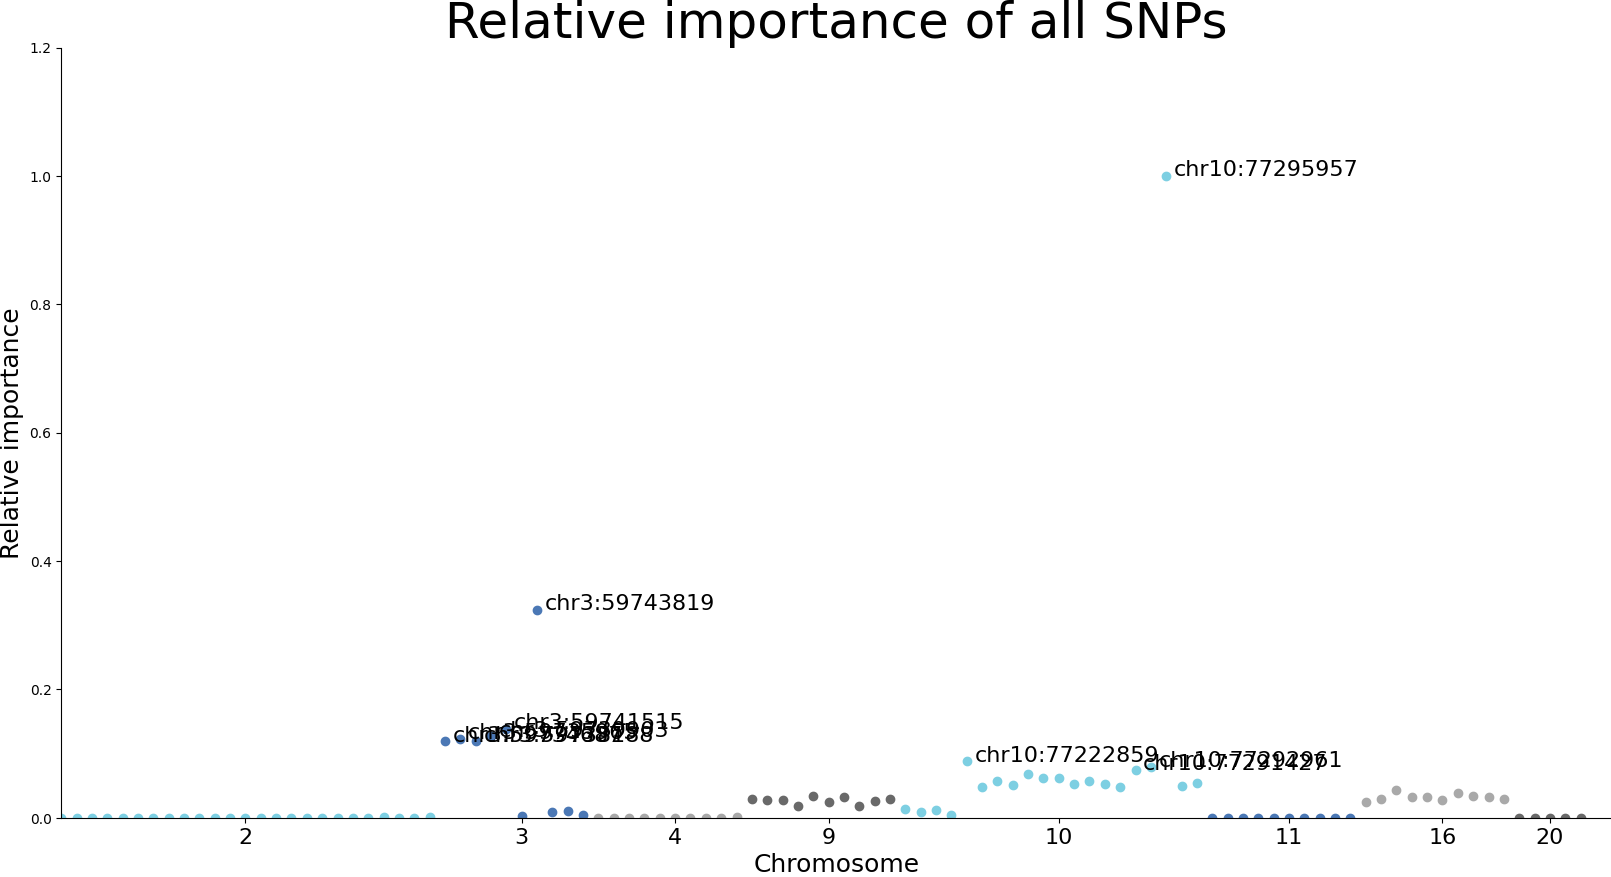

In [23]:
from IPython.display import Image
Image('results/GenNet_experiment_100001_/Manhattan_relative_importance_SNPs.png', width=1000)